### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN

### **Import Kaggle Dataset**

In [2]:
df = pd.read_csv("../input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")
df.head(10) #print first 10 entries of the dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


### **Inspect the dataset**

In [3]:
print(df.shape)

(858, 36)


In [4]:
print(df.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [5]:
print(df.describe())

              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000  

In [6]:
df = df.replace('?', np.NaN) #replacing missing values with Numpy NaN
print(df.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### **Identifying the percentage of missing values in each risk factor**

<AxesSubplot:>

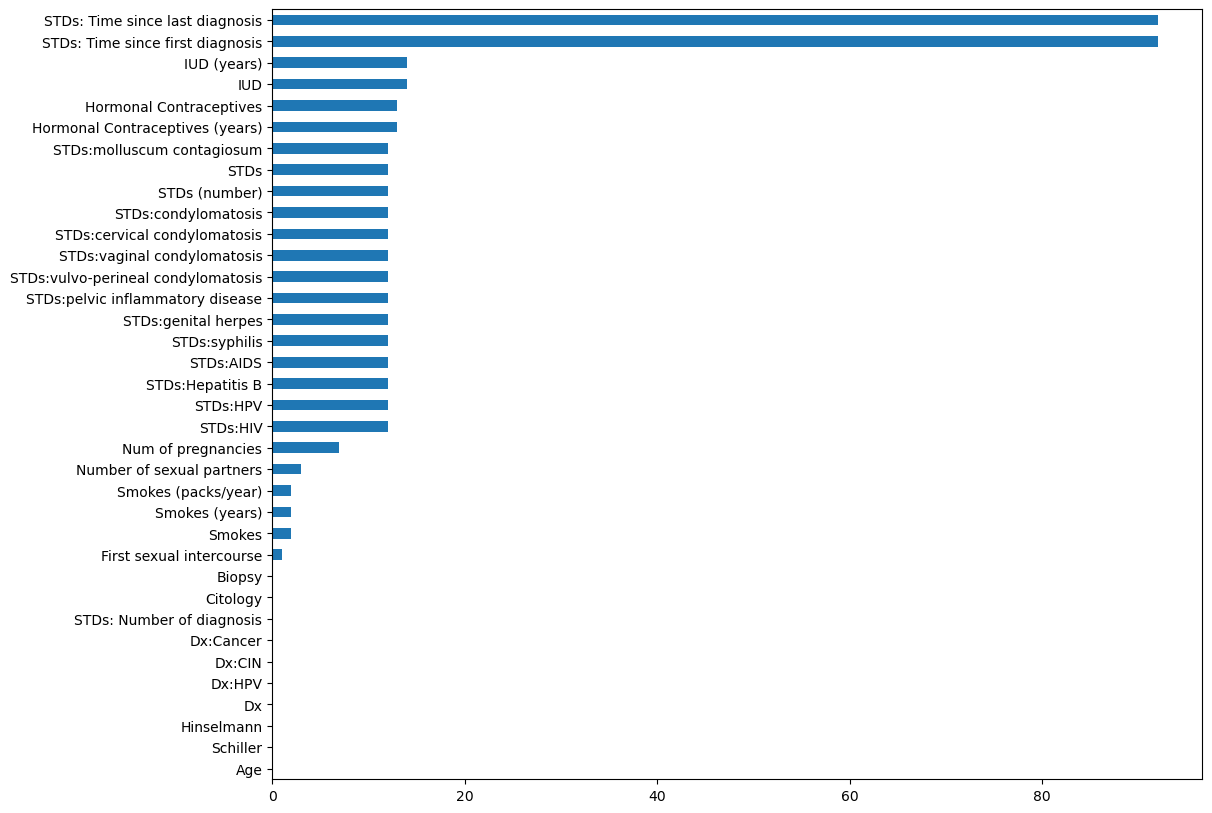

In [7]:
plt.figure(figsize=(12,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

#### **Now, columns STDs: Time since last diagnosis and STDs: Time since first diagnoses have a lot of missing values so we drop them as they won't be helpful in training the model.**

In [8]:
new_df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1) 
print(new_df.shape)

(858, 34)


#### **Assigning numerical and categorical columns manually**

In [9]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx','Hinselmann','Schiller','Citology','Biopsy']

## **Data Preprocessing: Dealing with missing values**

### **Imputing the numerical columns with median**

In [10]:
for feature in numerical_df:
    print(feature, '', pd.to_numeric(new_df[feature], errors='coerce').median())
    feature_median = round(pd.to_numeric(new_df[feature], errors='coerce').median(), 1)
    new_df[feature] = pd.to_numeric(new_df[feature], errors='coerce').fillna(feature_median)
new_df.head(20)

Age  25.0
Number of sexual partners  2.0
First sexual intercourse  17.0
Num of pregnancies  2.0
Smokes (years)  0.0
Smokes (packs/year)  0.0
Hormonal Contraceptives (years)  0.5
IUD (years)  0.0
STDs (number)  0.0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,NaN,...,0.0,0,0,0,0,0,0,0,0,0


### **Imputing the categorical columns with mode**

In [11]:
for feature in categorical_df:
    print(feature, '', new_df[feature].mode()[0])
    feature_mode = new_df[feature].mode()[0]
    new_df[feature] = new_df[feature].fillna(feature_mode)
new_df.head(20)

Smokes  0.0
Hormonal Contraceptives  1.0
IUD  0.0
STDs  0.0
STDs:condylomatosis  0.0
STDs:cervical condylomatosis  0.0
STDs:vaginal condylomatosis  0.0
STDs:vulvo-perineal condylomatosis  0.0
STDs:syphilis  0.0
STDs:pelvic inflammatory disease  0.0
STDs:genital herpes  0.0
STDs:molluscum contagiosum  0.0
STDs:AIDS  0.0
STDs:HIV  0.0
STDs:Hepatitis B  0.0
STDs:HPV  0.0
STDs: Number of diagnosis  0
Dx:Cancer  0
Dx:CIN  0
Dx:HPV  0
Dx  0
Hinselmann  0
Schiller  0
Citology  0
Biopsy  0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# **Target Variable: Hinselmann**

### **Now, only focus on Hinselmann target variable and drop the other three**

In [12]:
new_df = new_df.drop(['Schiller', 'Citology', 'Biopsy'],axis=1)

print(new_df.columns)

print(new_df.shape)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann'],
      dtype='object')
(858, 31)


### **Splitting Test and Train data**

In [13]:
X = new_df.iloc[:, :-1]  # select all columns except the last four
y1 = new_df['Hinselmann']

# Create a dictionary to store test sets for each target variable
test_sets = {}

# Split data and store test sets in the dictionary
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
test_sets['Hinselmann'] = (X_test, y1_test)

train_df = pd.concat([X_train, y1_train], axis=1)
test_df = pd.concat([X_test, y1_test], axis=1)

# Print the shapes of the test sets
print('Testing set shape:')
for target in test_sets:
    X_test, y_test = test_sets[target]
    print(f"{target}: {X_test.shape}, {y_test.shape}")
print(train_df.shape)
print(test_df.shape)

Testing set shape:
Hinselmann: (172, 30), (172,)
(686, 31)
(172, 31)


## **Data Preprocessing: Removing outliers**

### **To remove the outliers we use DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm.**

#### **The algorithm works by defining a neighborhood around each data point and then grouping together points that have a minimum number of neighbors within a specified distance. Points that do not have enough neighbors are considered outliers or noise.**

#### **This algo has two parameters, nin_samples and epsilon, if we fix min_samples, we can draw a plot which shows the sorted distances to the k-th nearest neighbor for each point in the dataset.**

#### **From there we can fix the value of epsilon.**

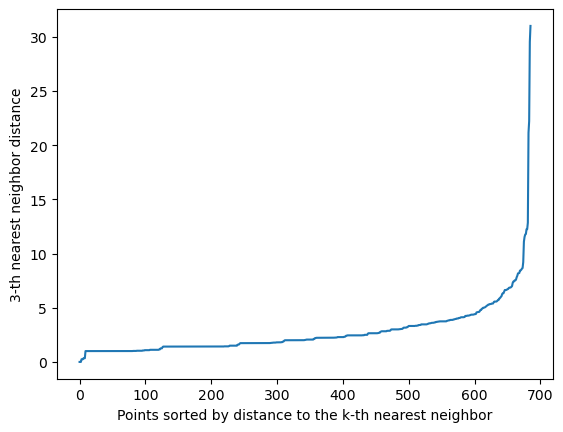

In [14]:
min_samples = 4  # Adjust this value according to your dataset
k = min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(train_df)

distances, _ = nearest_neighbors.kneighbors(train_df)
distances = np.sort(distances, axis=0)
distances = distances[:, -1]

plt.plot(distances)
plt.xlabel('Points sorted by distance to the k-th nearest neighbor')
plt.ylabel(f'{k}-th nearest neighbor distance')
plt.show()


#### **Now, in the above plot at approximately 3rd nearest neighbor distance of 7 the plot start increasing drastically.**

#### **So, epsilon = 7**

#### **So, we apply DBSCAN**

In [15]:
# Apply DBSCAN on the original unscaled training data
epsilon =  7 # This is a hyperparameter you may need to tune
min_samples = 4  # This is another hyperparameter you may need to tune
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(train_df)

# Identify the outliers
outliers = labels == -1
print(f"Outliers detected by DBSCAN: {outliers.sum()}")

# Remove or handle the outliers
# To remove the outliers:
train_df_no_outliers = train_df.loc[~outliers]

train_df_no_outliers.shape

Outliers detected by DBSCAN: 25


(661, 31)

### **Just to check if outliers are removed properly, we make a scatter plot of two components chosen by PCA.**

#### **The orange color dots are the outliers and blue color is of normal data.**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

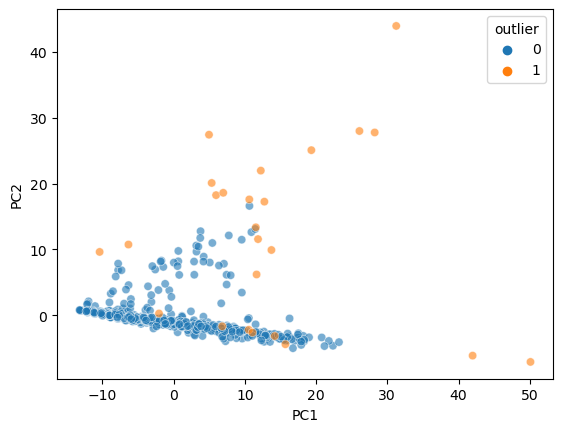

In [16]:
# Create DataFrames for normal data points and outliers
normal_data = train_df.loc[~outliers].copy()  # Add .copy() to avoid SettingWithCopyWarning
outlier_data = train_df.loc[outliers].copy()  # Add .copy() to avoid SettingWithCopyWarning

# Add a new column called 'outlier' to both DataFrames
normal_data['outlier'] = 0
outlier_data['outlier'] = 1

# Combine the DataFrames
combined_data = pd.concat([normal_data, outlier_data], axis=0)

# Perform PCA on the combined dataset
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(combined_data.iloc[:, :-1])

# Create a new DataFrame with the first two principal components
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['outlier'] = combined_data['outlier'].values

# Create a scatter plot
sns.scatterplot(x='PC1', y='PC2', hue='outlier', data=reduced_df, alpha=0.6)


#### **From the above plot we can see that most of the outliers are removed successfully by the DBSCAM**

## **Data Preprocessing: Scaling the data**

#### **We use RobustScaler to scale the train data, and use the same model for the test data as well**

In [17]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the RobustScaler to the training data (train_df_no_outliers)
scaler.fit(train_df_no_outliers)

# Transform the training data
train_scaled = scaler.fit_transform(train_df_no_outliers)

# Transform the test data using the same scaler
test_scaled = scaler.transform(test_df)

# Convert the scaled data to DataFrames
train_scaled_df = pd.DataFrame(train_scaled, columns=train_df_no_outliers.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns)

print(train_scaled_df.shape)

print(test_scaled_df.shape)

print(train_scaled_df.columns)

(661, 31)
(172, 31)
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann'],
      dtype='object')


### **Now we draw a boxplot for the scaled features for better visualisation**

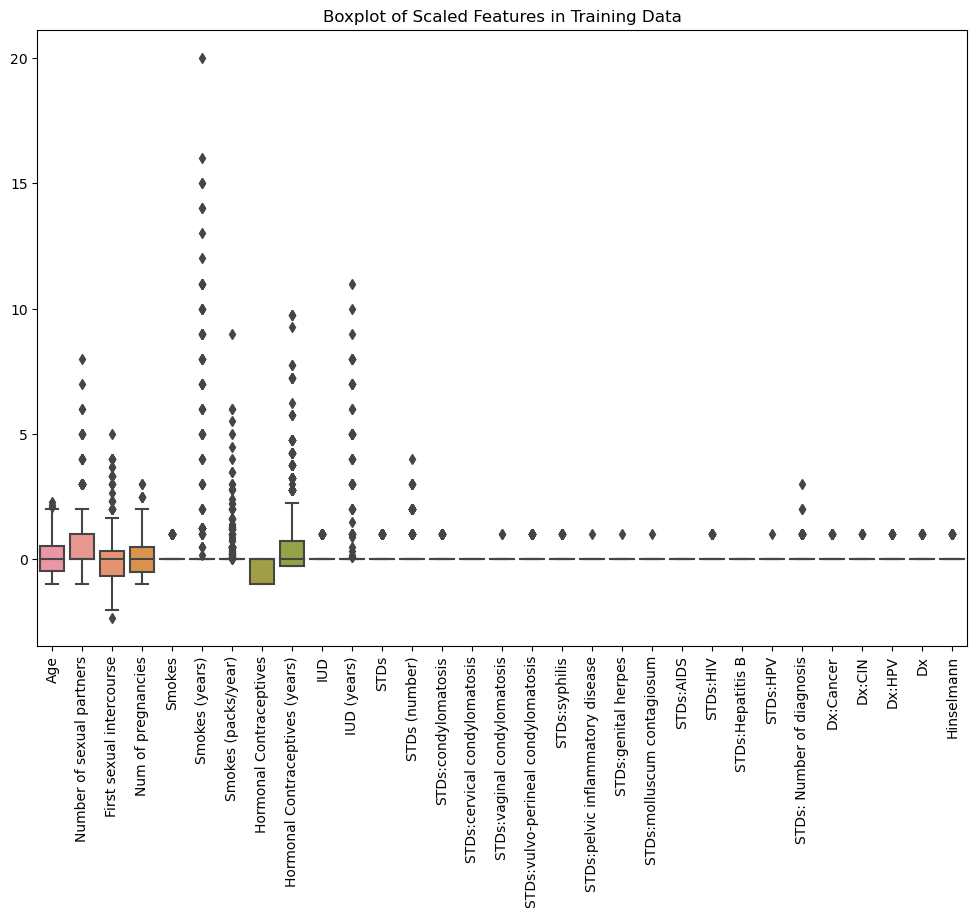

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_scaled_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features in Training Data")
plt.show()

#### **As, there are not many point too out of the dataset, the outliers have been removed perfectly**

## **Feature Extraction: Identifying useful features and removing redundant ones**

#### **First we make a correlation matrix to find if any numerical features are correlated**

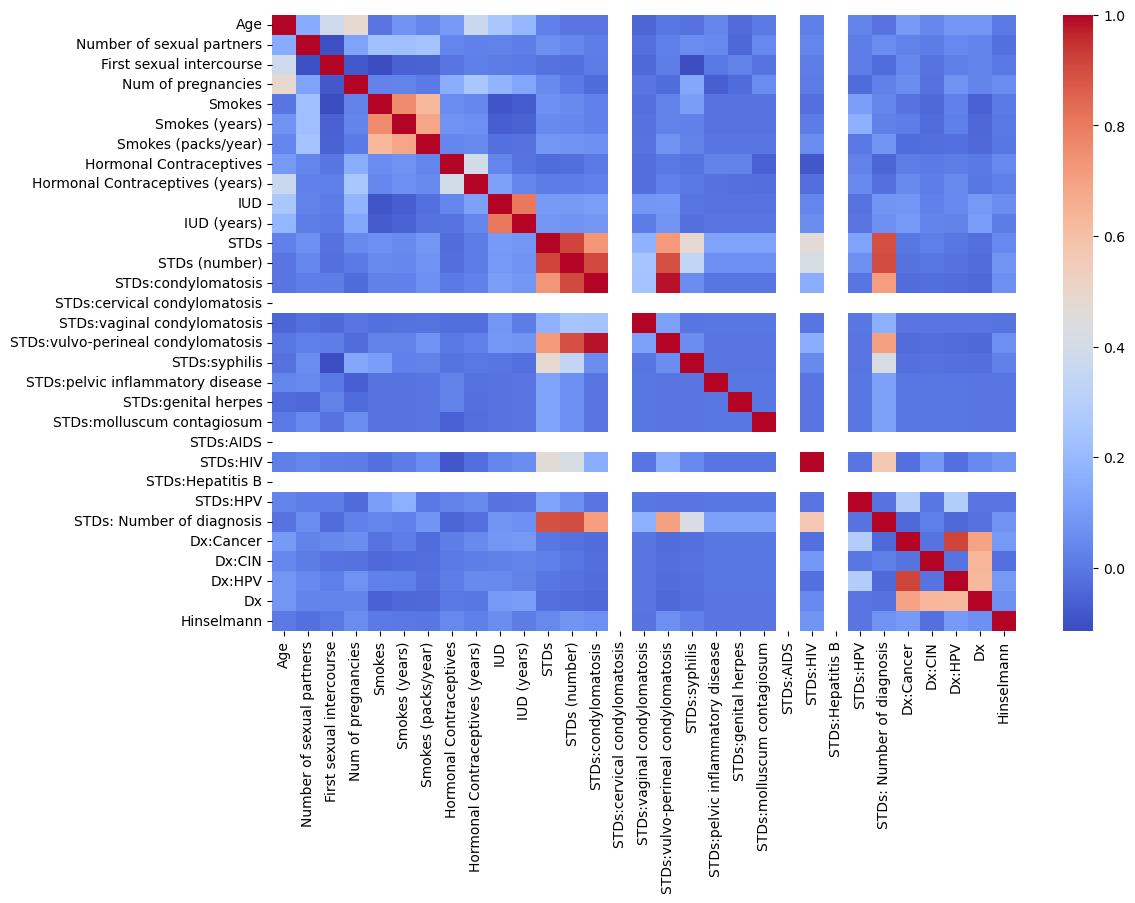

In [19]:
# Compute correlation matrix
correlation_matrix = train_scaled_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.show()


### **The features which are more red are highly correlated, so one of them is redundant**

#### **We keep a threshold of correlation coefficient = 0.8 for removing redundant features**

##### **To decide which one of the two should be removed, we use the average correlation of each feature with all other features as the criteria and remove the feature with the higher average correlation**

In [20]:
def remove_redundant_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = set()

    for i, row in enumerate(upper_tri.index):
        for j, col in enumerate(upper_tri.columns):
            if upper_tri.at[row, col] > threshold:
                if corr_matrix[row].mean() > corr_matrix[col].mean():
                    to_drop.add(row)
                else:
                    to_drop.add(col)

    df_reduced = df.drop(to_drop, axis=1)
    
    return df_reduced, list(to_drop)

new_df_reduced, removed_features = remove_redundant_features(train_scaled_df, threshold=0.8)

# Print the removed features
print("Removed features:", removed_features)
print(new_df_reduced.shape)
print(test_df.shape)
print(new_df_reduced.columns)

Removed features: ['Dx:Cancer', 'IUD', 'STDs', 'STDs (number)', 'STDs:condylomatosis']
(661, 26)
(172, 31)
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann'],
      dtype='object')


#### **The 'STDs:condylomatosis', 'Dx:Cancer', 'STDs (number)', 'STDs', 'IUD' columns have been dropped for the training dataset, so we drop them from the test dataset too to make them equal**

In [21]:
test_df = test_df.drop(['STDs:condylomatosis', 'Dx:Cancer', 'IUD', 'STDs (number)', 'STDs'],axis=1)
test_df.shape

(172, 26)

### **Applying PCA to extract principle components**

In [22]:
# Remove the target variable from the training dataset
train_df_features = new_df_reduced.drop(columns=['Hinselmann'])

# Remove the target variable from the test dataset
test_df_features = test_df.drop(columns=['Hinselmann'])

# Initialize PCA
pca = PCA(n_components=20)

# Fit PCA on the training data
pca.fit(train_df_features)

# Transform the training data using the PCA model
train_pca_transformed = pca.transform(train_df_features)

# Transform the test data using the same PCA model
test_pca_transformed = pca.transform(test_df_features)

# Convert the transformed data to DataFrames
train_pca_df = pd.DataFrame(train_pca_transformed, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
test_pca_df = pd.DataFrame(test_pca_transformed, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(train_pca_df.shape)
print(test_pca_df.shape)
print(train_pca_df.columns)


(661, 20)
(172, 20)
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20'],
      dtype='object')


### **Using SMOTE to balance the data**

#### **We have encoded the data as well**

In [23]:
# Extract the target variable from the original training dataset
train_target = train_df_no_outliers['Hinselmann']

# Encode the target variable
le = LabelEncoder()
train_y_encoded = le.fit_transform(train_target)

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE on the training data with PCA applied
train_pca_balanced, train_y_balanced = smote.fit_resample(train_pca_df, train_y_encoded)

# Convert the target variable back to the original labels
train_y_balanced = le.inverse_transform(train_y_balanced)


### **For visualisation, we draw a histogram of balanced classes of our target variable**

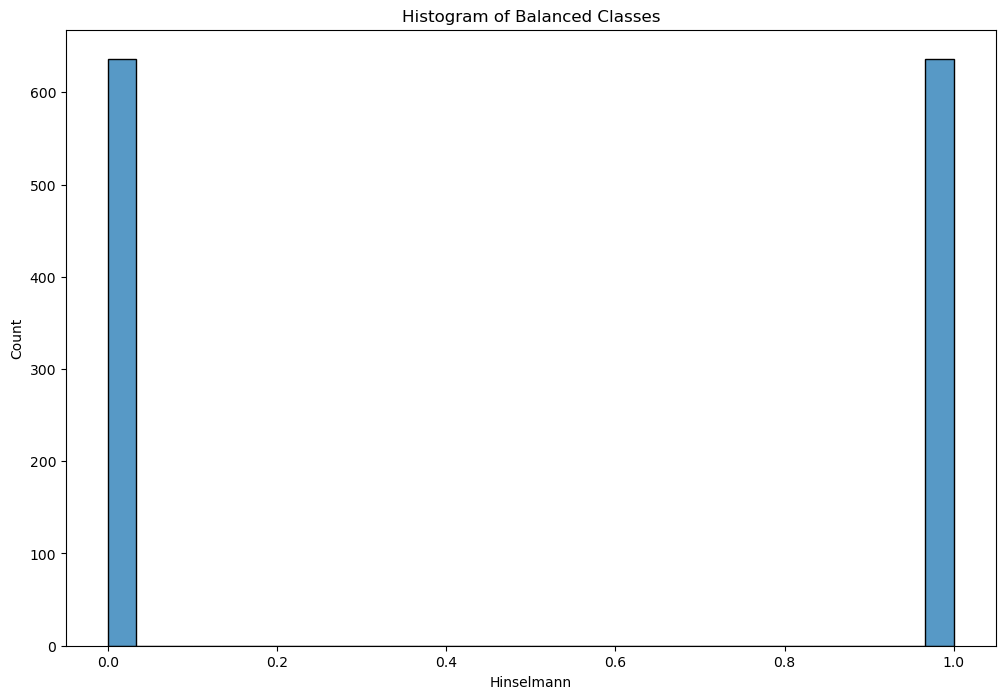

In [24]:
# Convert the target variable to a DataFrame
train_y_balanced_df = pd.DataFrame(train_y_balanced, columns=['Hinselmann'])

# Create a histogram of the balanced classes
plt.figure(figsize=(12, 8))
sns.histplot(data=train_y_balanced_df, x='Hinselmann', bins=30, kde=False)
plt.xlabel('Hinselmann')
plt.ylabel('Count')
plt.title('Histogram of Balanced Classes')
plt.show()


## **Finally, training and evaluating the model by SVM and KNN**

#### **We use GridSearchCV to find the best hyperparameters**

#### **We also plot the confusion matrices and find out Accuracy, Presicion and Recall for each target variable**

SVM Evaluation Metrics
Accuracy: 95.35%
Precision: 90.91%
Recall: 95.35%


KNN Evaluation Metrics
Accuracy: 95.35%
Precision: 90.91%
Recall: 95.35%


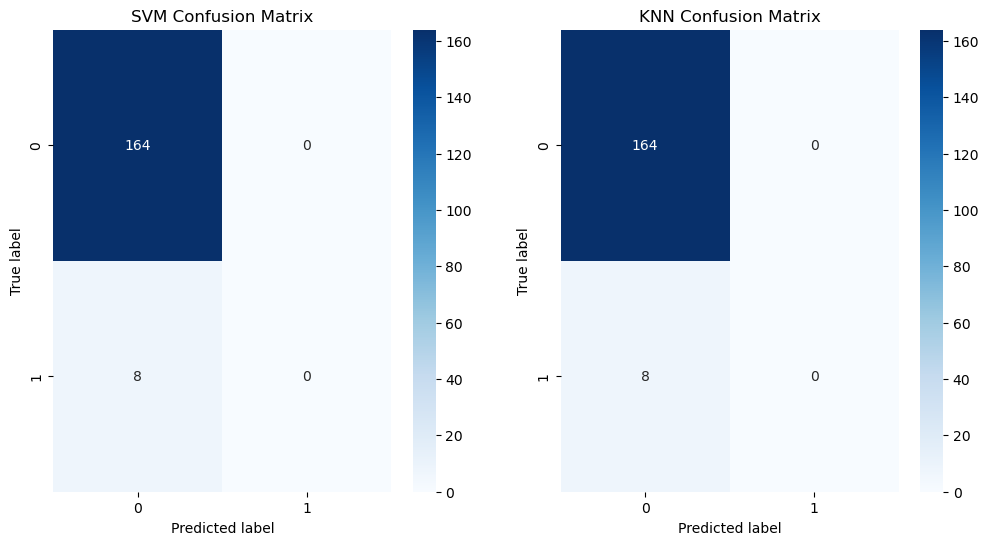

In [25]:
# Create a validation split from the training data
X_train, X_val, y_train, y_val = train_test_split(train_pca_balanced, train_y_balanced, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for SVM and KNN using grid search and cross-validation
svm_params = {'C': [0.1, 1, 10, 100]}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)

svm_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

# Train the classifiers with the best hyperparameters
best_svm = svm_grid.best_estimator_
best_knn = knn_grid.best_estimator_

# Evaluate the classifiers on the test dataset
y_pred_svm = best_svm.predict(test_pca_df)
y_pred_knn = best_knn.predict(test_pca_df)

test_y_encoded = le.transform(test_df['Hinselmann'])

print("SVM Evaluation Metrics")
print("Accuracy: {:.2f}%".format(accuracy_score(test_y_encoded, y_pred_svm) * 100))
print("Precision: {:.2f}%".format(precision_score(test_y_encoded, y_pred_svm, average='weighted', zero_division=0) * 100))
print("Recall: {:.2f}%".format(recall_score(test_y_encoded, y_pred_svm, average='weighted') * 100))
print("\n")
print("KNN Evaluation Metrics")
print("Accuracy: {:.2f}%".format(accuracy_score(test_y_encoded, y_pred_knn) * 100))
print("Precision: {:.2f}%".format(precision_score(test_y_encoded, y_pred_knn, average='weighted', zero_division=0) * 100))
print("Recall: {:.2f}%".format(recall_score(test_y_encoded, y_pred_knn, average='weighted') * 100))

# Plot the confusion matrix for each target variable
conf_matrix_svm = confusion_matrix(test_y_encoded, y_pred_svm)
conf_matrix_knn = confusion_matrix(test_y_encoded, y_pred_knn)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(conf_matrix_svm, annot=True, cmap="Blues", ax=ax[0], fmt='g')
ax[0].set_title("SVM Confusion Matrix")
ax[0].set_xlabel("Predicted label")
ax[0].set_ylabel("True label")

sns.heatmap(conf_matrix_knn, annot=True, cmap="Blues", ax=ax[1], fmt='g')
ax[1].set_title("KNN Confusion Matrix")
ax[1].set_xlabel("Predicted label")
ax[1].set_ylabel("True label")

plt.show()


## **Now, repeat the above steps accordingly for other target variables as well**

# **Target Variable: Schiller**